# **Heart Disease Prediction using Machine Learning and Data Analytics Approach**
###### By: Sanath Kapoor
###### Date: 05/10/2021

---
## **Introduction**
---

The heart is an essential organ in a human body which pumps blood through the body. A proper blood circulation is essential for a healthy living. The health of a human heart is largely dependent on a person’s behaviour and experiences. Certain genetic factors can also affect a person’s health. Even young people are at high risk of developing heart diseases.<br>
Machine learning is an AI method that enables software applications to improve their ability to predict outcomes without explicitly programming in. The algorithms used in Machine Learning rely on historical data to predict new output values. It does so by studying large sets of data. ML applications are tools that are used to perform specific tasks. They collect data independently and without human intervention. These algorithms are used to improve prediction accuracy.<br>
Different data preprocessing tools will be applied in order to make the dataset efficient and unbiased. Also, methods like **Feature Scaling, Correlation Heatmap, Feature Selection** will be applied in order to make the dataset as efficient as possible in order to get better performance.<br>
Machine learning classification algorithms such as **Naive Bayes, SVM and Random Forest** are going to be used to build our machine learning models. Also, a process called ***Ensemble Learning*** is going to be used which seeks better predictive performance such as high accuracy for classification. Hence, **XGBoost** which is an ensemble learning algorithm will be used to improve the performance of our model.

---
## **Dataset Description**
---

The dataset is publically available on the [Kaggle](https:////www.kaggle.com/johnsmith88/heart-disease-dataset) website. The classification goal is to predict whether a person is having heart disease or not. The dataset provides the patients' information, It includes 1018 records and 14 attributes.<br>
  ***Attributes:***<br>
* **Age:** displays the age of the individual in years
* **Sex:** displays the gender of the individual<br>
0: Female<br>
1: Male
* **cp:** Displays the type of chest pain experienced by the individual<br>
0: asymptomatic<br>
1: atypical angina<br>
2: non-anginal pain<br>
3: typical angina
* **trestbps:** Displays the resting blood pressure of an individual in mm/hg
* **chol:** Displays the Serum Cholestrol in mg/dl
* **fbs:** Compares the fasting blood sugar level of an individual relative to 120 mg/dl:<br>
0: fasting blooad sugar <= 120 mg/dl<br>
1: fasting blooad sugar > 120 mg/dl
* **restecg:** Displays resting electrocardiographic(ECG) results:<br>
0: normal<br>
1: having ST-T wave abnormality<br>
2: showing probable or definite left ventrical hyperthropy by Estes' criteria
* **thalach:** Displays the max heart rate achieved by an individual
* **exang:** Exercise induced chest pain<br>
0: No<br>
1: Yes
* **oldpeak:** ST(stress test) depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
* **slope:** The slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart<br>
0: upsloping<br>
1: flat<br>
2: downsloping
* **ca:** Number of major vessels(0-3)
* **thal:** Displays the thalassemia with possible values:<br>
1: normal<br>
2: fixed_defect(no blood flow in some part of the heart)<br>
3: reversible_defect(a blood flow is observed but it is not normal)<br>

  ***Target variable to predict:***<br>
* **target:** Displays whether the individual is suffering from heart disease or not:<br>
0: absence<br>
1: present<br>

---
## **Data Preprocessing**
---

---
### Importing the basic Libraries
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
### Importing the Dataset
---

> In this step, the dataset is uploaded by using the `pd.read_csv` function and then two different entities are created named **X** which stores all the features or independent variables & **Y** which stores just the dependent variable, that is, the Target variable.

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Project/heart.csv")

> In order to see first few rows of the dataset `dataset.head()` funtion and used followed by the `dataset.info()` function which provides the details of the dataset.

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


---
### Checking the Data Type
---

In [ ]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

> Now, lets use the `nunique()` function to return the number of unique elements in a feature.

In [ ]:
dataset.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

> As we know that the feature **ca** ranges from 0–3 which means it can have 4 values ranging from 0-3. However, `df.nunique()` listed **ca** having 5 values, that is, ranging from 0-4. So lets find the ‘4’ and change them to NaN.

In [ ]:
dataset['ca'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
# to count the number in of each category decending order
dataset.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [ ]:
# to find the row for '4'
dataset[dataset['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [ ]:
dataset.loc[dataset['ca']==4, 'ca'] = np.NaN

In [ ]:
dataset['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

> Similarly, feature **thal** ranges from 1–3, which means it will have total 3 values. However, `dataset.nunique()` listed **thal** having in total 4 values, that is, ranging from 0-4. So lets find the ‘0’ and change them to NaN.

In [ ]:
dataset['thal'].unique()

# to count the number in of each category decending order
dataset.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [ ]:
# to find the row for '0'
dataset[dataset['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [ ]:
dataset.loc[dataset['thal']==0, 'thal'] = np.NaN
dataset['thal'].unique()

array([ 1.,  2.,  3., nan])

---
### Missing Values
---

In [ ]:
# to check missing values
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [ ]:
#total percentage of missing data
missing_data = dataset.isnull().sum()
total_percentage = (missing_data.sum()/dataset.shape[0])*100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 2.31%


> Replacing the 'NaN' values with the median.

In [ ]:
dataset = dataset.fillna(dataset.median())
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

> As we can observe that all the missing data from our dataset has been replaced with the median, leaving no missing data behind.

---
### Removing Duplicate Rows
---




In [ ]:
duplicated = dataset.duplicated().sum()
if duplicated:
  print('Duplicate Rows in Dataset are: {}'.format(duplicated))
else:
  print('Dataset contains no Duplicate Rows')

Duplicate Rows in Dataset are: 1


In [ ]:
duplicated = dataset[dataset.duplicated(keep=False)]
duplicated.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


> There is only 1 duplicate row present in our dataset, so in order to make our dataset clean and unbiased, lets drop the duplicate row by using the `dataset.drop_duplicates()` function.

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0.0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0.0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2.0,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1.0,3.0,0


> As we can see, that one of our duplicate rows has been removed and now we are having a dataset with **302 rows** & **14 columns**.

---
### Removing Outliers
---



> Let us now use the `dataset.describe()` function which is used to get a statistical summary of the dataset.<br>
Any set of data can be described by its five-number summary. These five numbers, which give you the information you need to find patterns and outliers, consist of (in ascending order):
* The minimum or lowest value of the dataset
* The first quartile Q1, which represents a quarter of the way through the list of all data
* The median of the data set, which represents the midpoint of the whole list of data
* The third quartile Q3, which represents three-quarters of the way through the list of all data
* The maximum or highest value of the data set.

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.665563,2.327815,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.935142,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


> From the statistical summary shown above we get an idea by observing the continuous variables of our dataset that there might be some outliers present.<br>
For instance, if we observe the **chol** feature in the above table, we see that there is a vast difference between the *3rd Qaurtile (75%) and the max value* which means that there might be some outliers present.<br>
In order to get a better picture, we will plot the outliers with the help of **Boxplot**.

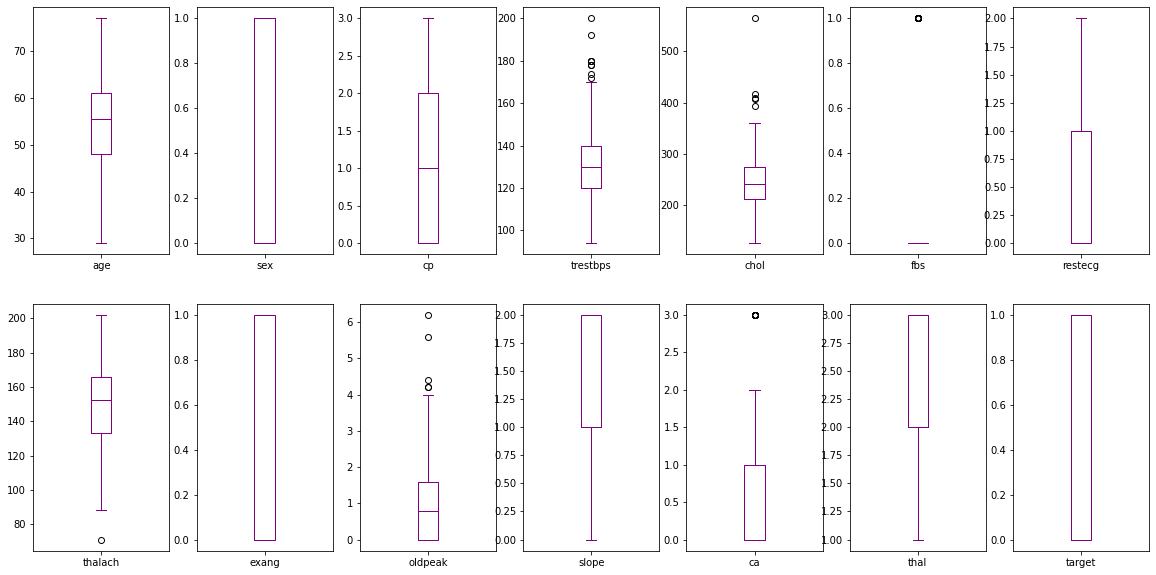

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='purple');

> From the Boxplot shown above, it can be confirmed that some of the continuous features of our dataset are having maojority number of outliers present in them.<br>
In order to remove these outliers we will be use **Inter Quartile Range (IQR) method**.<br>
The inter quartile method finds the outliers on numerical/continuous features by following the procedure given below:
* Find the first quartile, Q1.
* Find the third quartile, Q3.
* Calculate the IQR. IQR= Q3-Q1.
* Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.
* Any data point outside this range is considered as outlier and should be removed for further analysis.<br><br>

Full Reference: [here](https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce)

> Let us first make a function named **outlier_IQR()** in order to get the total number of outliers present in each coninuous feature of our dataset and then use the same funtion to drop the outliers from the dataset.

In [ ]:
# define continuous variable & plot
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outlier_IQR(dataset_out, drop = False):
    for each_feature in dataset_out.columns:
        feature_data = dataset_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outlier_IQR = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outlier_IQR)))
        if drop:
            dataset.drop(outlier_IQR, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outlier_IQR(dataset[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


> The list above shows the number of outliers present in each continuous feature.<br>
Now, lets drop these outliers for better and more accurate performance of our Machine Learning Models, as presence of data outliers can spoil and mislead the training process resulting in *longer training times, less accurate models and ultimately poorer results*. <br>
So now lets remove these outliers by using the same funtion with the parameter `drop=True`.

In [ ]:
outlier_IQR(dataset[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


In [ ]:
dataset.shape

(283, 14)

> The list above shows that all the outliers which were present in our coninuous features have been removed. So lets check it once again by plotting **Boxplot** for the same.

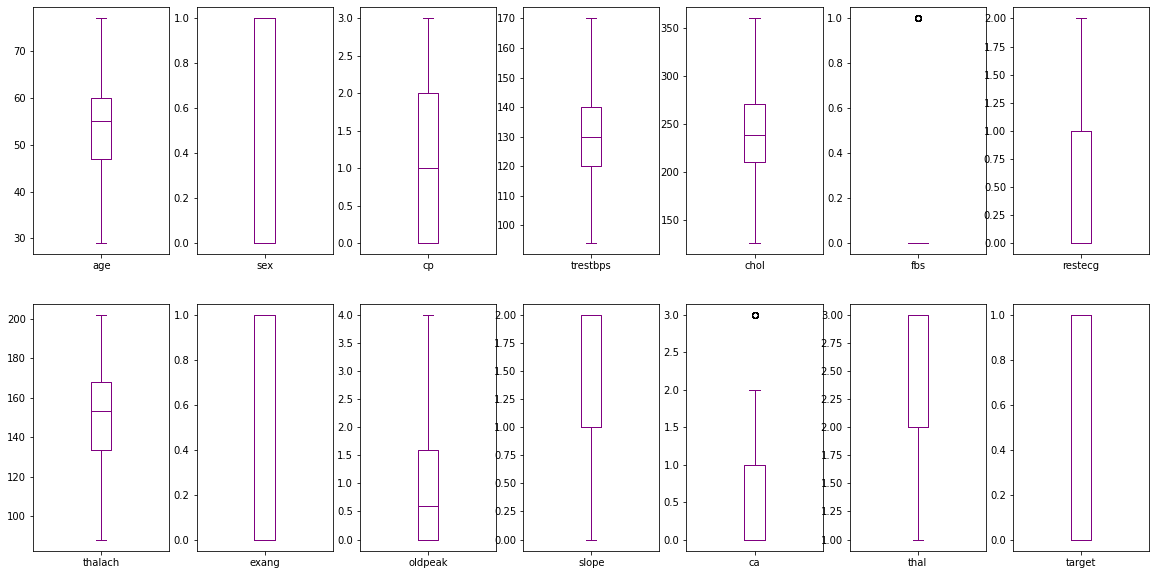

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='purple');

> As we can very well see from the boxplots shown above, tha,t all the outliers which were earlier present in the continuous features of our dataset have now been removed making our dataset all cleaned up and ready to split it into training and test set.

---
### Splitting the dataset into Trainig Set & Test Set
---

> Lets first create two subsets of the dataset named **X** and **y** containing the *Independent Features* and *Dependent Feature(target variable)* respectively, and then split them into training set and test set.<br>
After which we will split both of them into tarining_set & test_set in the ratio of **80:20** respectively by using the `train_test_split()` function.<br>
 

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((226, 13), (57, 13), (226,), (57,))

In [ ]:
print(X_train)

[[76.  0.  2. ...  1.  0.  2.]
 [71.  0.  0. ...  1.  0.  2.]
 [59.  1.  1. ...  2.  0.  2.]
 ...
 [67.  1.  0. ...  1.  3.  2.]
 [57.  1.  2. ...  1.  1.  3.]
 [38.  1.  3. ...  1.  0.  3.]]


---
### Feature Scaling
---

> Scaling of Features is an essential step while building machine learning models. The data that is usually used for the purpose of modeling is derived through various means which contains features of various dimensions and scales altogether. Different scales of the data features affect the modeling of a dataset adversely which leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. Thus, it is necessary to Scale the data prior to modeling.<br><br>
There are two of the most common techniques of feature scaling named **Normalization** & **Standardization**.<br>
For our project we will be using **Standardization** which transforms the data to have zero mean and a variance of 1 and make the data unitless.<br>
Particularly, we will be using **StandardScaler()** to scale our dataset.<br>

Full Reference: [here](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

> This last step brings us to the end of our **Data Preprocessing** phase. Now, we will move forward and perform **Exploratory Data Analysis** on the entire dataset in order to get some insights from our data with the help of visualizations.

---
## **Exploratry Data Analysis**
---

---
### Target Variable Distribution
---

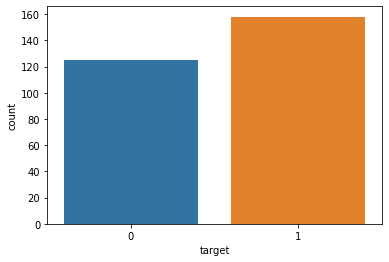

There are 125 patients without heart disease and 158 patients with the disease


In [ ]:
sns.countplot(x='target',data=dataset)
plt.show()
cases = dataset.target.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

From the graph shown above it can be observed that there are in total **125 patients without heart disease** and **158 patients with heart disease.** making the entire dataset fairly balanced.


---
### Number of people having Heart Disease on the basis of Age
---

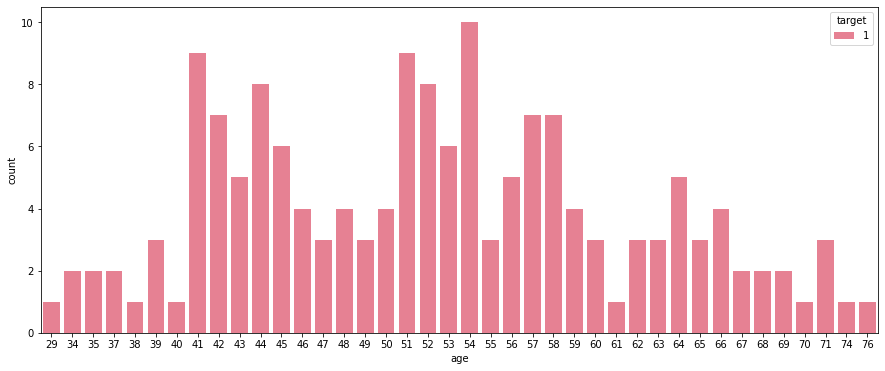

In [ ]:
positive_cases = dataset[dataset['target'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'target', palette='husl')
plt.show()

From the graph shown above it can be observed that the people with the highest risk of developing any heart disease are between the ages of **41 and 54.**

---
### Data Distribution of Continuous Features
---

> Plotting histogram for the entire dataset in order to see the distribution of the data.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


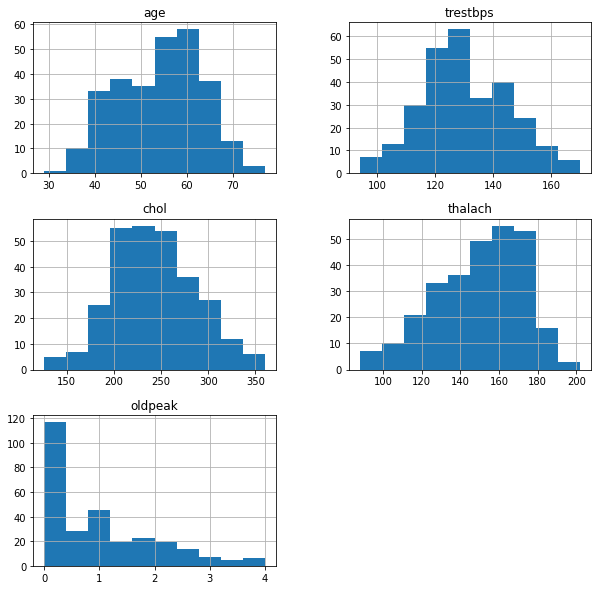

In [ ]:
#plot histogram to see the distribution of the data
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
dataset[continous_features].hist(ax = ax)
plt.show()

> From the plot shown above following observations can be made:
* *age, trestbps & chol* are having normal distribution of data
* *oldpeak* is left-skewed
* *thalach* is right-skewed<br>
Lets check the skewness score for **oldpeak** & **thalach** . 
  + If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. 
  + If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. 
  + If the skewness is less than -1 or greater than 1, the data are highly skewed.


In [ ]:
dataset['oldpeak'].skew()

0.9242722763001783

In [ ]:
dataset['thalach'].skew()

-0.4835092053644669

> The skewness score of both the features show that non of them are highly skewed as **oldpeak** has skewness score of 0.92 which means it is moderately skewed and  **thalach** has a score of -0.48 which lies in the range of fairly symmetrical. Therefore, it is not needed to improve there score.<br>
Moving forward to plotting a Correlation Heat Map for all the features.

---
### Correlation Heat Map
---

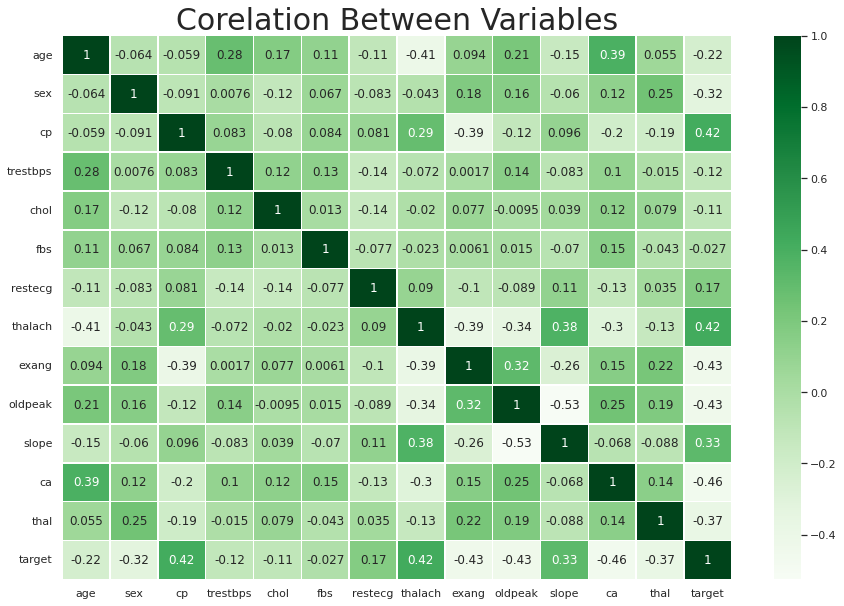

In [ ]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(dataset.corr(), annot = True, linewidths=.5, cmap="Greens")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

> From the correlation map given above it can be observed that there are no features with more than 0.5 correlation with the target variable. However, there are few features like **restecg, cp, thalach & slope** which show positive correlation with the target variable as compared to others.<br>
Also there are not many features which are highly correlated with each other, that is, no set of features have correlation greater than 0.5 with each other.

---
## **Model Development**
---

---
### Loading Libraries
---

In [ ]:
from collections import Counter
from sklearn.model_selection import cross_val_score, GridSearchCV
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier
import xgboost as xgb
import itertools
from sklearn.dummy import DummyClassifier
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


> Using sklearn’s DummyClassifier to determine our baseline accuracy — which the success rate one should expect to achieve even if simply guessing.

In [ ]:
dummy_clf = DummyClassifier(strategy="stratified", random_state=10)
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.5263157894736842

> This gave us an accuracy of 52.6%, which is useful as a measure of comparison to our model

> Now, its time to develop our classification models, and print there **accuracy and F1 scores** in order for us to compare the performance of each model and select the one with the best performance.

---
###  Logistic Regression
---

In [ ]:
lr = LogisticRegression()
# Fit the classifier to the training set
lr.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_lr = lr.predict(X_test)
lr_acc_score=metrics.accuracy_score(y_test, y_pred_lr)
lr_f1_score=metrics.f1_score(y_test, y_pred_lr)
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr)
# checking accuracy
print('Test Accuracy score: ', lr_acc_score)
print('Test F1 score: ', lr_f1_score)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_lr))

Test Accuracy score:  0.8771929824561403
Test F1 score:  0.8923076923076922
confusion matrix
[[21  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.88      0.91      0.89        32

    accuracy                           0.88        57
   macro avg       0.88      0.87      0.87        57
weighted avg       0.88      0.88      0.88        57



---
### Naive Bayes
---

In [ ]:
nb = GaussianNB()
# Fit the classifier to the training set
nb.fit(X_train,y_train)
# make class predictions for the testing set
y_pred_nb = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test,y_pred_nb)
nb_acc_score = metrics.accuracy_score(y_test, y_pred_nb)
nb_f1_score=metrics.f1_score(y_test, y_pred_nb)
print('Test Accuracy score: ',nb_acc_score)
print('Test F1 score: ', nb_f1_score)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_nb))

Test Accuracy score:  0.8771929824561403
Test F1 score:  0.8923076923076922
confusion matrix
[[21  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.88      0.91      0.89        32

    accuracy                           0.88        57
   macro avg       0.88      0.87      0.87        57
weighted avg       0.88      0.88      0.88        57



---
### Random Forest
---

In [ ]:
rfc = RandomForestClassifier(n_estimators=40, criterion='entropy', n_jobs=-1, random_state=10)
# Fit the classifier to the training set
rfc.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_forest = rfc.predict(X_test)
rfc_acc_score=metrics.accuracy_score(y_test, y_pred_forest)
rfc_f1_score = metrics.f1_score(y_test, y_pred_forest)
rfc_conf_matrix=confusion_matrix(y_test,y_pred_forest)
# checking accuracy
print('Test Accuracy score: ', rfc_acc_score)
print('Test F1 score: ', rfc_f1_score)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_forest))

Test Accuracy score:  0.8947368421052632
Test F1 score:  0.90625
confusion matrix
[[22  3]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.91      0.91      0.91        32

    accuracy                           0.89        57
   macro avg       0.89      0.89      0.89        57
weighted avg       0.89      0.89      0.89        57



---
### K-Nearest Neighbor
---

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15, n_jobs=-1)
# Fit the classifier to the training set
knn.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_knn = knn.predict(X_test)
knn_acc_score=metrics.accuracy_score(y_test, y_pred_knn)
knn_f1_score=metrics.f1_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
# checking accuracy
print('Test Accuracy score: ', knn_acc_score)
print('Test F1 score: ',knn_f1_score )
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_knn))

Test Accuracy score:  0.8947368421052632
Test F1 score:  0.9090909090909091
confusion matrix
[[21  4]
 [ 2 30]]


              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.88      0.94      0.91        32

    accuracy                           0.89        57
   macro avg       0.90      0.89      0.89        57
weighted avg       0.90      0.89      0.89        57



---
### Support Vector Classifier
---

In [ ]:
svc =  SVC(kernel='rbf', C=2)
# Fit the classifier to the training set
svc.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_svc = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)
svc_acc_score = metrics.accuracy_score(y_test, y_pred_svc)
svc_f1_score = metrics.f1_score(y_test, y_pred_svc)
# checking accuracy
print('Test Accuracy score: ',svc_acc_score)
print('Test F1 score: ', svc_f1_score)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_svc))

Test Accuracy score:  0.8771929824561403
Test F1 score:  0.8955223880597014
confusion matrix
[[20  5]
 [ 2 30]]


              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.86      0.94      0.90        32

    accuracy                           0.88        57
   macro avg       0.88      0.87      0.87        57
weighted avg       0.88      0.88      0.88        57



---
### Decision Tree
---

In [ ]:
tree = DecisionTreeClassifier()
# Fit the classifier to the training set
tree.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_tree = tree.predict(X_test)
tree_acc_score=metrics.accuracy_score(y_test, y_pred_tree)
tree_f1_score=metrics.f1_score(y_test, y_pred_tree)
tree_conf_matrix=confusion_matrix(y_test,y_pred_tree)
# checking accuracy
print('Test Accuracy score: ', tree_acc_score)
print('Test F1 score: ', tree_f1_score)
print("confusion matrix")
print(tree_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_tree))

Test Accuracy score:  0.7017543859649122
Test F1 score:  0.7301587301587302
confusion matrix
[[17  8]
 [ 9 23]]


              precision    recall  f1-score   support

           0       0.65      0.68      0.67        25
           1       0.74      0.72      0.73        32

    accuracy                           0.70        57
   macro avg       0.70      0.70      0.70        57
weighted avg       0.70      0.70      0.70        57



---
### Extreme Gradient Boost
---

In [ ]:
xg_cl = xgb.XGBClassifier(learning_rate=0.01, n_estimators=10, seed=25)
# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)
# make class predictions for the testing set
y_pred_xgb = xg_cl.predict(X_test)
xgb_acc_score=metrics.accuracy_score(y_test, y_pred_xgb)
xgb_f1_score = metrics.f1_score(y_test, y_pred_xgb)
xgb_conf_matrix=confusion_matrix(y_test,y_pred_xgb)
# checking accuracy
print('Test Accuracy score: ',xgb_acc_score)
print('Test F1 score: ', xgb_f1_score)
print("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_xgb))

Test Accuracy score:  0.8421052631578947
Test F1 score:  0.8656716417910447
confusion matrix
[[19  6]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.83      0.91      0.87        32

    accuracy                           0.84        57
   macro avg       0.85      0.83      0.84        57
weighted avg       0.84      0.84      0.84        57



> In order to select the best performing model, we first need to select the metric which will be the best for the case. For this, I did some research and found this [article](https://https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2) where it is mentioned, that, *accuracy* should be chosen as classification metric if the class distribution is almost similar and the *True Positives* and the *True Negatives* are more important.<br>
Therefore, since in this case it is more important for us to predict whether a person is having a heart disease or not, therefore, accuracy is used as the classification metric.<br><br>
Lets us now create a dataframe consisting of all the models along with there accuracy to get a better picture.

In [ ]:
model = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes', 'Random Forest', 'K-Nearest Neighbour', 'Support Vector Classifier',
                                'Decision Tree', 'Extreme Gradient Boost'], 
                      'Accuracy': [lr_acc_score, nb_acc_score, rfc_acc_score, knn_acc_score, svc_acc_score, tree_acc_score, xgb_acc_score]})
model

,Model,Accuracy
0,Logistic Regression,0.877193
1,Naive Bayes,0.877193
2,Random Forest,0.894737
3,K-Nearest Neighbour,0.894737
4,Support Vector Classifier,0.877193
5,Decision Tree,0.701754
6,Extreme Gradient Boost,0.842105


> As we can see that the accuracy scores above, range from 60-80's, with only **Decision Tree** being the least accurate amongst all the others.<br>
Now the question is whether the accuracy scores can still be improved and brought above 90%. In order to find this, we will be using **Ensemble Learning Method**.

---
## Ensemble Learning Method
---

In [ ]:
from sklearn.ensemble import StackingClassifier

estimator_list = [
    ('nb',nb),
    ('rfc',rfc),
    ('knn',knn)]

# Build stack model
sc = StackingClassifier(
    estimators=estimator_list, final_estimator=RandomForestClassifier(n_estimators=40, criterion='entropy', n_jobs=-1, random_state=42), cv=6
)

# Train stacked model
sc.fit(X_train, y_train)

# Make predictions
sc_predicted = sc.predict(X_test)
sc_conf_matrix = confusion_matrix(y_test, sc_predicted)
sc_acc_score = accuracy_score(y_test, sc_predicted)
sc_f1_score = f1_score(y_test, sc_predicted)
print("confusion matrix")
print(sc_conf_matrix)
print("\n")
print("Accuracy of StackingClassifier:",sc_acc_score*100,'\n')
print(classification_report(y_test,sc_predicted))

confusion matrix
[[23  2]
 [ 2 30]]


Accuracy of StackingClassifier: 92.98245614035088 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.94      0.94      0.94        32

    accuracy                           0.93        57
   macro avg       0.93      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



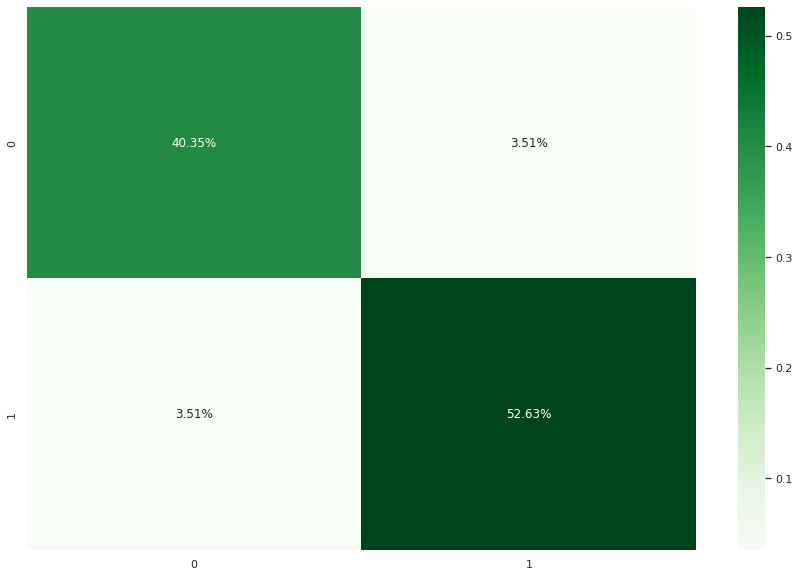

In [ ]:
sns.heatmap(sc_conf_matrix/np.sum(sc_conf_matrix), annot=True, 
            fmt='.2%', cmap='Greens')

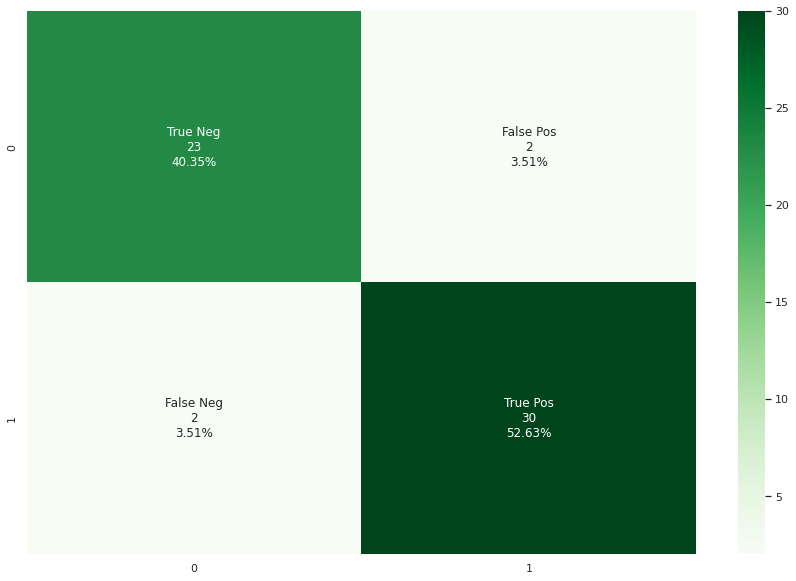

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                sc_conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     sc_conf_matrix.flatten()/np.sum(sc_conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(sc_conf_matrix, annot=labels, fmt='', cmap='Greens')

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
  # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

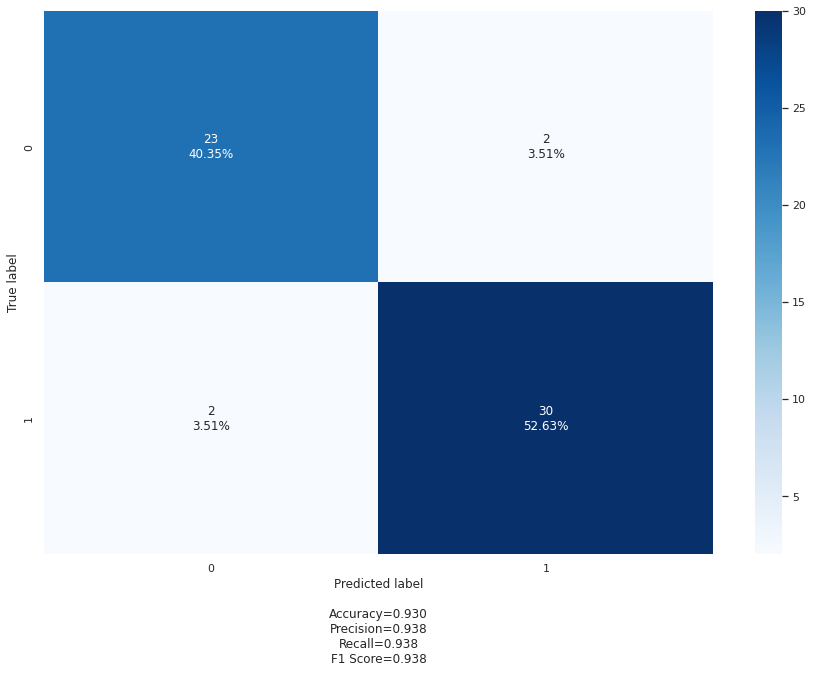

In [ ]:
make_confusion_matrix(sc_conf_matrix)